# Simultaneous Equations

Consider the following two equations:
$$2x + y = 6$$
$$3x - 2y = 2$$

A general system of m linear equations with n unknowns can be written as
        $$a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n = b_1$$
        $$a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n = b_2$$
        $$...$$
        $$a_{m1}x_1 + a_{m2}x_2 + ... + a_{mn}x_n = b_m$$

There are many ways to solve simultaneous equations:
* Elimination Method
* Substitution Method
* Graphical Method
* Matrix Method

For more see: http://www.vivaxsolutions.com/maths/gcsesmltnsequations.aspx

## With sympy

The algorithm used in sympy is fraction-free Gaussian elimination, which results, after elimination, in an upper-triangular matrix. Then solutions are found using back-substitution. This approach is more efficient and compact than the Gauss-Jordan method. (Source: http://docs.sympy.org/latest/modules/solvers/solvers.html)

For more info, see https://files.eric.ed.gov/fulltext/EJ923724.pdf

In [1]:
import sympy as sy
from sympy.plotting import plot

In [2]:
x1 = sy.Symbol('x1')
x2 = sy.Symbol('x2')

In [3]:
expr1 = 2*x1 + 1*x2 - 6
expr2 = 3*x1 - 2*x2 - 2

In [4]:
sy.solve(expr1, x2)

[-2*x1 + 6]

In [5]:
sy.solve(expr2, x2)

[3*x1/2 - 1]

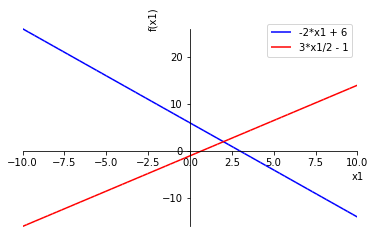

In [6]:
p = plot(sy.solve(expr1, x2)[0],
         sy.solve(expr2, x2)[0],
         legend=True,
         show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

In [7]:
sy.solve((expr1, expr2), dict=True)

[{x1: 2, x2: 2}]

Example above inspired by https://www.amazon.com/Doing-Math-Python-Programming-Statistics/dp/1593276400

## Matrix Method with numpy

For a closer look into this method, see the following Khan Academy video:

In [8]:
import numpy as np
import fractions
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})

In [9]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://youtube.be/embed/0_DYEFtlCiM?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

These were our two equations:
$$2x + y = 6$$
$$3x - 2y = 2$$

In [63]:
# Just like in the video, we set A equal to the matrix containing
# coefficients of x and y (s and t in the video)
A = np.array([[2, 1],
              [3, -2]])

In [64]:
# We set b equal to the terms of degree one when isolated on one side
# of the equation
b = np.array([[6],
              [2]])

In [65]:
# We will use the linear algebra module in numpy to obtain the 
# inverse matrix of A
A_inv = np.linalg.inv(A)

In [66]:
# Let's have a look
A_inv

array([[2/7, 1/7],
       [3/7, -2/7]])

In [67]:
# If we create the dot product of a matrix and its inverse, we should
# get the identity matrix
np.round(np.dot(A, A_inv))

array([[1, 0],
       [0, 1]])

In [68]:
# What we are after though is to solve for x and y, we we get by 
# creating the dot product between the inverse of A and b
# We should get the same result as above
np.round(np.dot(A_inv, b))

array([[2],
       [2]])

In [69]:
# Let's put this into a function
def solve_sim_eq(A, b):
    """
    Description
    ----------
    Solves for the variables in a system of linear equations.
    A general system of m linear equations with n unknowns
    can be written as
        a11x1 + a12x2 + ... + a1nxn = b1
        a21x1 + a22x2 + ... + a2nxn = b2
        ...
        am1x1 + am2x2 + ... + amnxn = bm
    Parameters
    ----------
    A = array of shape m by n, containing the a values
    b = array of shape m by 1, containing the b values
    Returns
    -------
    Array of shape m by 1 with the solutions for x1 to xn
    Examples
    --------
    IN:
    >>> A = np.array([[3., -2., 1.],
                      [1., 1., 1.],
                      [3., -2., -1.]])
    >>> b = np.array([[7.],
                     [2.],
                     [3.]])
    >>> solve_sim_eq(A, b)
    OUT:
    >>> array([[1],
              [-1],
              [2]])
    """
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    if np.linalg.det(A) != 0:
        A_inv = np.linalg.inv(A)
        return np.round(np.dot(A_inv, b), 10)
    else: # if the determant is 0, matrix A is singular (no inverse)
        # Either the lines are all the same or they are parallel
        # The following tests this
        test = np.sum(A, axis=1) / b.reshape(1, b.shape[0])
        t = test[0, 0]
        if len(test[test != t]) == 0: # Means they are the same
             return [np.Infinity]
        else: # Means they are parallel
            return []

## Examples

### Let's have a look at an example with 3 unknowns.  

For 3 unknowns we need 3 equations:
$$3x_1 - 2x_2 + x_3 = 7$$
$$x_1 + x_2 + x_3 = 2$$
$$3x_1 - 2x_2 - x_3 = 3$$

In [17]:
# Assign all the a variables
a11 = 3
a12 = -2
a13 = 1
a21 = 1
a22 = 1
a23 = 1
a31 = 3
a32 = -2
a33 = -1

In [18]:
# Assign all the b variables
b1 = 7
b2 = 2
b3 = 3

In [19]:
# Using the sympy way
x1 = sy.Symbol('x1')
x2 = sy.Symbol('x2')
x3 = sy.Symbol('x3')
expr1 = a11*x1 + a12*x2 + a13*x3 - b1
expr2 = a21*x1 + a22*x2 + a23*x3 - b2
expr3 = a31*x1 + a32*x2 + a33*x3 - b3
result = sy.solve((expr1, expr2, expr3), dict=True)
print("The solution for \nx1 is %d,\nx2 is %d,\nx3 is %d") % (result[0][x1],
                                                              result[0][x2],
                                                              result[0][x3])

The solution for 
x1 is 1,
x2 is -1,
x3 is 2


In [20]:
# Using the matrix way
A = np.array([[a11, a12, a13],
              [a21, a22, a23],
              [a31, a32, a33]])
b = np.array([[b1],
              [b2],
              [b3]])
result = solve_sim_eq(A, b)
print("The solution for \nx1 is %d,\nx2 is %d,\nx3 is %d") % (result[0, 0],
                                                              result[1, 0],
                                                              result[2, 0])

The solution for 
x1 is 1,
x2 is -1,
x3 is 2


### What if there is no solution?
$$3x_1 + 2x_2 = 12$$
$$3x_1 + 2x_2 = 6$$

In [57]:
# Assign all the a variables
a11 = 3
a12 = 2
a21 = 3
a22 = 2

In [58]:
# Assign all the b variables
b1 = 12
b2 = 6

In [59]:
# Using the sympy way
x1 = sy.Symbol('x1')
x2 = sy.Symbol('x2')
expr1 = a11*x1 + a12*x2 - b1
expr2 = a21*x1 + a22*x2 - b2
result = sy.solve((expr1, expr2), dict=True)
if result == []:
    print("There is no result")
else:
    print("The solution for \nx1 is %d,\nx2 is %d") % (result[0][x1],
                                                       result[0][x2])

There is no result


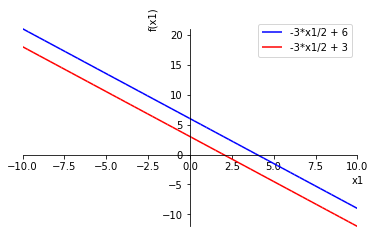

In [60]:
# When we plot this we can see the lines are parallell to each other
p = plot(sy.solve(expr1, x2)[0],
         sy.solve(expr2, x2)[0],
         legend=True,
         show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

In [61]:
# Using the matrix way
A = np.array([[a11, a12],
              [a21, a22]])
b = np.array([[b1],
              [b2]])
result = solve_sim_eq(A, b)
if result == []:
    print("There is no result")
else:
    print("The solution for \nx1 is %d,\nx2 is %d") % (result[0][x1],
                                                       result[0][x2])

There is no result


### What if there are infinite solutions?
$$6x_1 + 4x_2 = 12$$
$$3x_1 + 2x_2 = 6$$

In [51]:
# Assign all the a variables
a11 = 6
a12 = 4
a21 = 3
a22 = 2

In [52]:
# Assign all the b variables
b1 = 12
b2 = 6

In [53]:
# Using the sympy way
x1 = sy.Symbol('x1')
x2 = sy.Symbol('x2')
expr1 = a11*x1 + a12*x2 - b1
expr2 = a21*x1 + a22*x2 - b2
result = sy.solve((expr1, expr2), dict=True)
if result == []:
    print("There is no result")
elif x2 not in result:
    print("There are infinite solutions: %s") % (result[0][x1])
else:
    print("The solution for \nx1 is %d,\nx2 is %d") % (result[0][x1],
                                                       result[0][x2])

There are infinite solutions: -2*x2/3 + 2


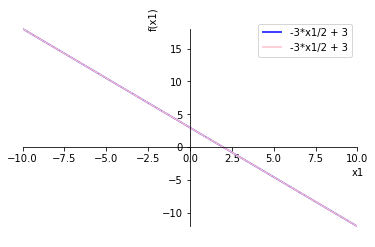

In [54]:
# When we plot this we can see the lines are on top of each other
p = plot(sy.solve(expr1, x2)[0],
         sy.solve(expr2, x2)[0],
          legend=True,
          show=False)
p[0].line_color = 'blue'
p[1].line_color = 'pink'
p.show()

In [55]:
# Using the matrix way
A = np.array([[a11, a12],
              [a21, a22]])
b = np.array([[b1],
              [b2]])
result = solve_sim_eq(A, b)
if result == []:
    print("There is no result")
elif result == [np.Infinity]:
    print("There are infinite solutions")
else:
    print("The solution for \nx1 is %d,\nx2 is %d") % (result[0][x1],
                                                       result[0][x2])

There are infinite solutions


## With just numpy

In [45]:
A = [[4, 6, 2],
     [3, 4, 1],
     [2, 8, 13]]

s = [9, 7, 2]

r = np.linalg.solve(A, s)

In [46]:
r

array([3, -1/2, 0])